# Visualizing The Gender Gap In College Degrees
(Визуализация гендерного разрыва среди бакалавров)

Это учебный проект из курса Storytelling Through Data Visualization на DataQuest.

Задача этого проекта - отобразить на графиках динамику соотношения полов обучающихся по разным программам в американских колледжах с 1970 по 2011 год. Нужно не только добиться желаемых визуальных эффектов (минимум "лишнего" на графиках, только нужная информация), но и разбить категории специальностей на три группы и отобразить графики для каждой группы в отдельной колонке. Итого должно получиться три колонки с графиками.

Оригинальное решение тут: https://github.com/dataquestio/solutions/blob/master/Mission149Solutions.ipynb

Мое решение отличается от оригинального следующим:
* Вместо отрисовки каждой колонки по отдельности я рисую все графики сразу, распределяя по рядам и колонкам в соответствии с тем, в какой группе и какой по порядку идет категория.
* Мелочь, но все же: подпись к линии на графике я позиционирую по вертикали не "в лоб", а подсчитываю, исходя из последнего значения в ряду данных.
* Совсем мелочь, некоторые детали визуализации, даже перечислять не буду.

In [11]:
#Подключаем нужные библиотеки и считываем данные из файла
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Итак, в первой колонке таблицы указан год, остальные колонки соответствуют категориям специальностей, и указана в них доля женщин, получивших степень бакалавра по этой специальности.

Теперь приступим к собственно обработке данных. Списки с группами специальностей сделаны точно так же, как указано в задании и в оригинальном решении:
* stem_cats - Science, technology, engineering, and mathematics
* lib_arts_cats - Liberal Art
* other_cats - все остальное

Из этих трех списков я сделала еще один список, двухуровневый. Именно по расположению элементов в нем (по индексам элементов) и будем определять, в какой ячейке сетки нужно рисовать соответствующий график.

In [ ]:
#Создаем простые списки специальностей (как в задании на DataQuest)
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages','English', 'Communications and Journalism', 
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 
              'Agriculture','Business', 'Architecture']

#Объединяем созданные списке в двухуровневый список
joined_cats = [stem_cats,lib_arts_cats,other_cats]

Теперь я создам две функции: первая нужна для отрисовки графика в ячейке сетки, вторая - для позиционировани подписи на графике.

In [12]:
#Функция отрисовывает график в указанной ячейке сетки
#На входе подаются координаты ячейки (номер ряда и номер колонки)

def fillCell(rowNum,colNum):    
    #Вычисляем порядковый номер ячейки в сетке
    cellNum = rowNum*3 + colNum + 1
    #Используем координаты ячейки для выбора категории специальностей, которая нужна для построения графика
    cat = joined_cats[colNum][rowNum]    
    
    #Создаем фигуру в указанной ячейке сетки и отрисовываем на ней два графика: по оси X значения года из колонки 'Year',
    #по оси Y соответствующие им значения из колонки, которая определена выше в переменной cat
    ax = fig.add_subplot(6,3,cellNum)
    ax.plot(women_degrees['Year'], women_degrees[cat], c=(0/255,107/255,164/255), linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[cat], c=(255/255, 128/255, 14/255), linewidth=3)
    
    #Убираем линии осей
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    
    #Ставим ограничения на значения на осях, создаем заголовки графиков
    ax.set_xlim(1970, 2011)
    ax.set_ylim(0,100)
    ax.set_title(cat)
    
    #Убираем надписи к меткам с оси X всех графиков, кроме самых нижних, и метки осей со всех графиков
    if (len(joined_cats[colNum])-1) != rowNum:
        ax.tick_params(labelbottom='off')    
    ax.tick_params(bottom="off", top="off", left="off", right="off")    
    
    #Указываем свои метки для оси Y
    yticks = [0,50,100]
    ax.set_yticks(yticks)
    linecolor = (171/255, 171/255, 171/255)
    for percent in yticks:
        ax.axhline(percent, c=linecolor, alpha=0.3)
    
    #Добавляем подписи к линиям на графиках верхнего и нижнего рядов,
    #для позиционирования по оси Y используем функцию posY
    if (rowNum == 0) or (rowNum == 5):
        lastIndex = len(women_degrees[cat]) - 1
        ax.text(2004, posY(women_degrees[cat].iloc[lastIndex]), 'Women')
        ax.text(2007, posY(100 - women_degrees[cat].iloc[lastIndex]), 'Men')

#Функция вычисляет y-координату надписи в зависимости от расположения последнего значения в ряду данных. 
#Если значение ниже (ближе к нулю), то и надпись будет ниже (ближе к нулю по оси y).
#Кроме того, если значение больше 50 (50 - это среднее значение), то надпись будет ПОД графиком, 
#если значение меньше 50, надпись НАД графиком
def posY(lastValue):    
    if lastValue < 50:
        position_y = lastValue - 7
    else:
        position_y = lastValue + 5
    return position_y        

И наконец нарисуем все графики, используя созданную ранее функцию fillCell.

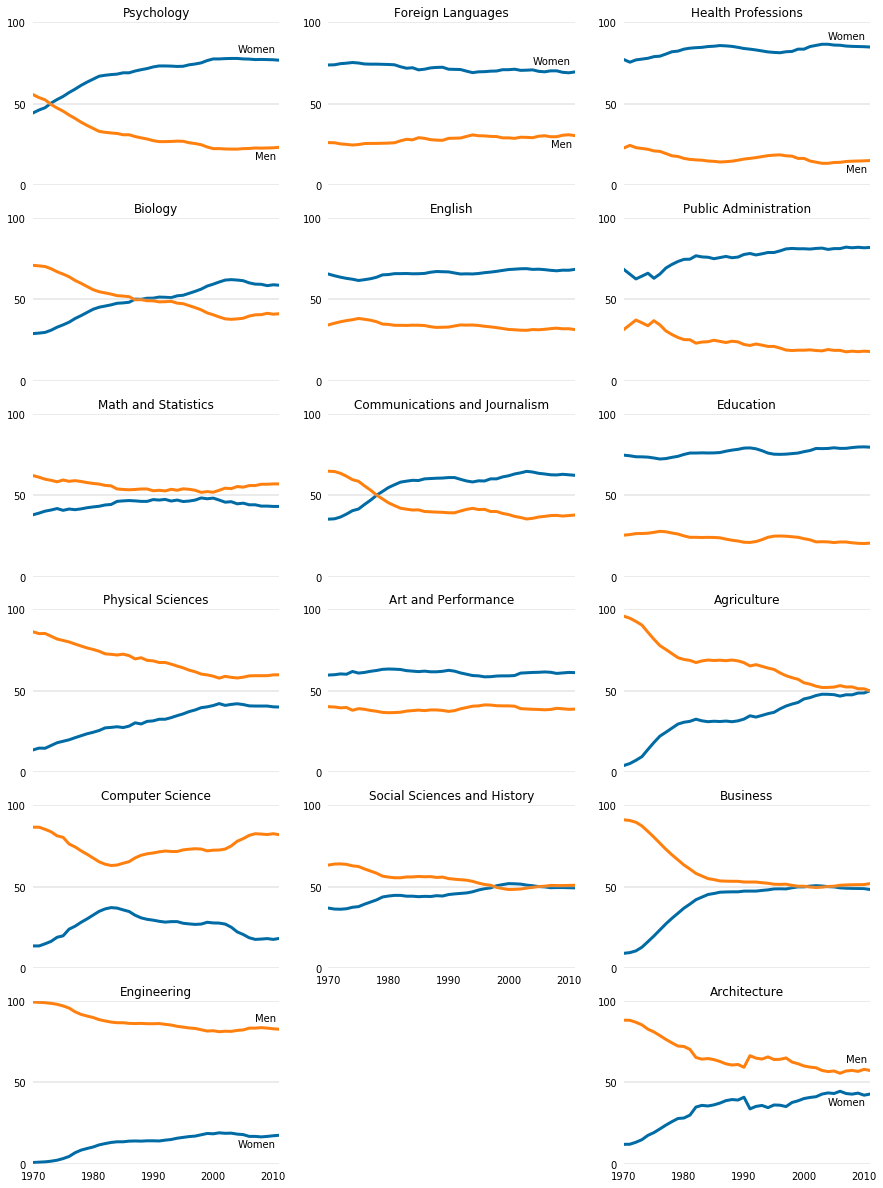

In [13]:
#Создаем основу для сетки с графиками
fig = plt.figure(figsize=(15, 21))

#Создаем сетку для расположения в ней графиков, начиная с рядов, их будет шесть
for row in range(0,6):
    #В каждом ряду - по три ячейки. 
    for col in range(0,3):
        #В каждой ячейке нужно отрисовать график.
        #Если с данными все в порядке, график нарисуется, если нет - переходим к следующей ячейке. 
        #Это сделано из-за того, что в группе специальностей lib_arts_cats всего пять категорий вместо шести, 
        #поэтому в шестом ряду график в средней колонке рисовать будет не из чего, и функция выдаст ошибку
        try:
            fillCell(row,col)
        except:
            pass
        
#Сохраняем результат в файл
plt.savefig('gender_degrees.png')       

## Выводы
В первой группе специальностей с условным названием STEM (Science, technology, engineering, and mathematics) в большей части специальностей на протяжении всего времени преобладали мужчины. Это четыре из шести специальностей: Math and Statistics, Physical Sciences, Computer Science и Engineering. И если в Math and Statistics преобладание мужчин не такое значительное, то в Computer Science и Engineering более выраженное. В категории Psychology в начале указанного периода немного пробладали мужчины, но через несколько лет баланс изменился в пользу женщин, причем с течением времени разрыв увеличивался, и примерно на протяжении последних 10 лет оставался почти неизменных. Интересная ситуация с Biology: сначала заметно преобладали мужчины, но примерно посередине исследуемого периода ситуация поменялась, стали преобладать женщины, хотя разрыв не слишком большой.

Во второй группе, Liberal Art, самое стабильное соотношение полов обучающихся в колледжах было по таким специальностям как Art and Performance, Foreign Languages, English, причем соотношение полов во всех упомянутых категорях в пользу женщин: их больше, чем мужчин. В категории Communications and Journalism пончалу преобладали мужчины, но вскоре соотношение полов изменилось в пользу женщин. В категории Social Sciences and History изначально наблюдалось небольшое преобладание мужчин, но с течением времени разрыв сократился, и ближе к концу периода стал практически незаметен.

В третьей группе можно заметить наибольшие колебания в соотношении полов, особенно в категории Architecture: в начале периода был большой разрыв, и заметно преобладали мужчины, но постепенно разница уменьшалась, хотя и не равномерно. Похожая ситуация, но с меньшими колебаниями, в категориях Agriculture и Business: здесь в начале периода был большой разрыв в пользу мужчин, но к концу периода соотношение практически выровнялось.